<a href="https://colab.research.google.com/github/adrien50/Human-Activity-Recognition/blob/main/runwalkeda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
The project aims to detect whether the person is running or walking based on deep neural network and sensor data collected from iOS device.Currently, the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

* acceleration_x
* acceleration_y
* acceleration_z
* gyro_x
* gyro_y
* gyro_z

There is an activity type represented by "activity" column which acts as label and reflects following activities:

* "0": walking
* "1": running

Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

* "0": left wrist
* "1": right wrist

Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements. reference : https://www.kaggle.com/vmalyi/run-or-walk/notebooks

## Upload libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import shutil

import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

## Load Dataset and Viewing the top 5 records

In [ ]:
dfname = pd.read_csv('walkrun.csv')
dfname.head(5)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


# Checking the data types


In [ ]:
dfname.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


#Shape of dataset

In [ ]:
dfname.shape

(88588, 11)

#checking null values


In [ ]:
dfname.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

# Overview of numerical data

In [ ]:
dfname.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


activity column represents categorical variable with following possible values:

* 0: "walk"
* 1: "run"

In [ ]:
dfname.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

**Dataset contains 44223 "walk" data samples as well as 44365 "run" data samples**

Apart of that, the dataset contains "wrist" column which 
represents the wrist where the device was placed to collect a
 sample on:

* "0": left wrist
* "1": right wrist

In [ ]:
dfname.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

The dataset contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist

 ## Data Skewness Analysis

Since it's a common problem, that often datasets contain skewed data (data which overrepsents one or several classes over other) let's take a look whether this dataset suffers from this problem.

In [ ]:
# Wrist types
LEFT_WRIST = 0
RIGHT_WRIST = 1

# populate dataframe with 'walk' data only
dfname_walk_data = pd.DataFrame()
dfname_walk_data = dfname[(dfname.activity == 0)]

# populate dataframe with 'run' data only 
dfname_run_data = pd.DataFrame()
dfname_run_data = dfname[(dfname.activity == 1)]

walk_data_left_wrist_count = pd.value_counts(dfname_walk_data['wrist'].values, sort=False)[LEFT_WRIST]
walk_data_right_wrist_count = pd.value_counts(dfname_walk_data['wrist'].values, sort=False)[RIGHT_WRIST]

run_data_left_wrist_count = pd.value_counts(dfname_run_data['wrist'].values, sort=False)[LEFT_WRIST]
run_data_right_wrist_count = pd.value_counts(dfname_run_data['wrist'].values, sort=False)[RIGHT_WRIST]


print('Total number of "walk" data samples: ' + str(len(dfname_walk_data)))
print('    Number of left wrist samples: ' + str(walk_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(walk_data_right_wrist_count))
print('Total number of "run" data samples: ' + str(len(dfname_run_data)))
print('    Number of left wrist samples: ' + str(run_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(run_data_right_wrist_count))


Total number of "walk" data samples: 44223
    Number of left wrist samples: 18622
    Number of right wrist samples: 25601
Total number of "run" data samples: 44365
    Number of left wrist samples: 23708
    Number of right wrist samples: 20657


We can see that the number of walk samples recorded on the right wrist is 

significantly more than the samples recorded on the left wrist but the total

 number of walk and run samples is almost the same.

 # Numerical Data Distribution

Since we have samples from both left and wright wrists, we will explore distribution of numerical data separately for both wrists.


In [ ]:
SENSOR_COLUMNS = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
dfname_left_wrist_data = pd.DataFrame()
dfname_left_wrist_data = dfname[dfname.wrist == 0]

# populate dataframe with 'right' wrist only
dfname_right_wrist_data = pd.DataFrame()
dfname_right_wrist_data = dfname[dfname.wrist == 1]

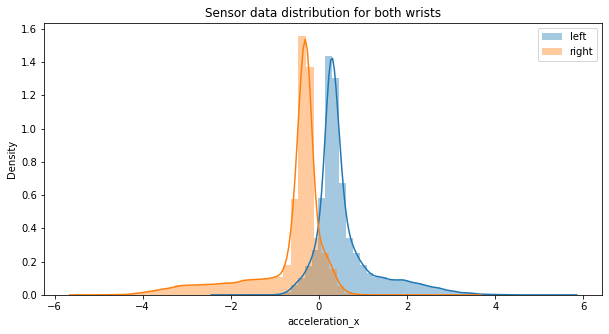

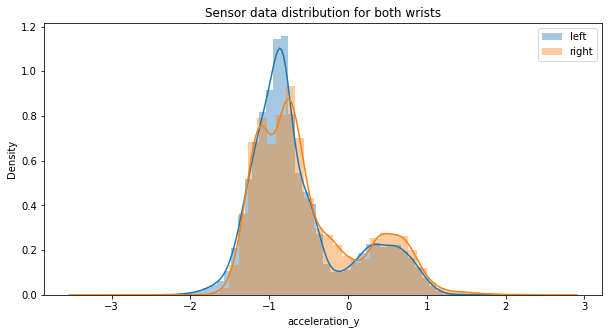

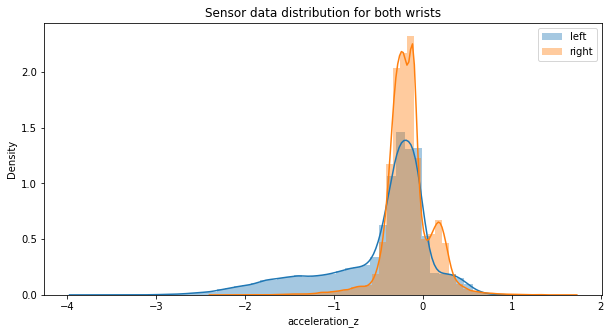

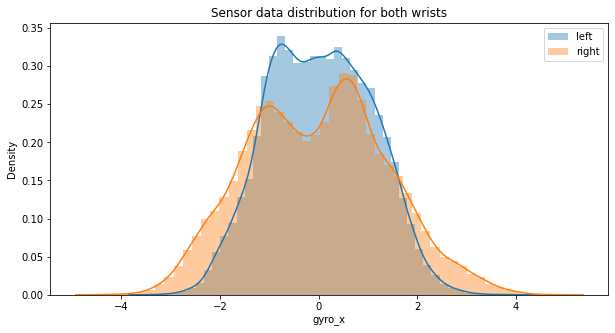

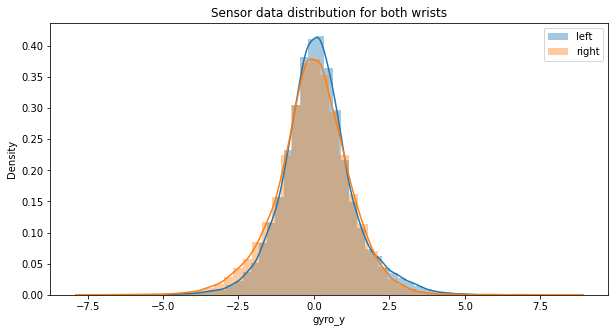

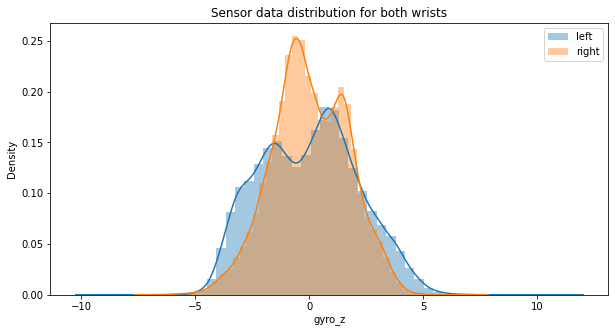

In [ ]:
for k in SENSOR_COLUMNS:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for both wrists")
    sns.distplot(dfname_left_wrist_data[k], label='left')
    sns.distplot(dfname_right_wrist_data[k], label='right')
    plt.legend()
    plt.show()

 Data distribution of all sensor axes is either symmetrical or close to equal 

**Conclusion** : The data analyzed in this notebook is normally distributed and doesn't suffer from skewing and can be considered as a high quality one since it is properly formatted, delivers clear values and doesn't contain null  values.

